In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
## If local runtime, python=3.10.12
## ln -sf /usr/lib/x86_64-linux-gnu/libstdc++.so.6 /home/felipe/anaconda3/envs/breg/bin/../lib/libstdc++.so.6
!pip install -U pandas matplotlib networkx scikit-learn seaborn

In [3]:
!pip install torchvision torch_geometric 
!pip install rpy2==3.5.1
!pip install umap-learn
!pip install igraph
!pip install find-julia
## Install julia if in colab
# !wget https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.1-linux-x86_64.tar.gz
# !tar zxvf julia-1.8.1-linux-x86_64.tar.gz -C /usr/local --strip-components 1
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/BregmanClustering.git --no-deps
!pip install leidenalg
import os
import pandas as pd
import pickle
from sys import platform
import BregmanTests
os.chmod(BregmanTests.__path__[0]+"/install_algos.sh",777)
if platform == "win32":
    os.environ["R_HOME"] = r"C:\\Program Files\R\R-4.2.3"
else:
    ## if local runtime
#     os.environ["R_HOME"] = "/usr/lib/R"
    ### Uncomment line below if in Google Colab environment
    print(os.path.isfile(BregmanTests.__path__[0]+"/install_algos.sh"))
    ### Done

  Cloning https://github.com/FelipeSchreiber/BregmanClustering.git to /tmp/pip-req-build-udl2lk2q
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/BregmanClustering.git /tmp/pip-req-build-udl2lk2q
  Resolved https://github.com/FelipeSchreiber/BregmanClustering.git to commit be62af8682f94f5a72bd0b5e4827c0453955edb8
  Preparing metadata (setup.py) ... done
  Created wheel for bregClust: filename=bregClust-1.0-py3-none-any.whl size=46363 sha256=1ddf50ceede447b477418c0353cada8cfeb9c111f7abb9e5367cf9444e1fcac9
  Stored in directory: /tmp/pip-ephem-wheel-cache-yalgf_fi/wheels/3f/90/fb/833529540c1d5f19c385fde761cc07c664c4b9a5edf7c6735b
Successfully built bregClust
  Attempting uninstall: bregClust
    Found existing installation: bregClust 1.0
    Uninstalling bregClust-1.0:
      Successfully uninstalled bregClust-1.0
True


In [4]:
from BregmanTests.benchmark import *
n_average = 5
n_clusters = 4
factor = 300
n = int(factor*n_clusters)
d = 1
sizes = [ n // n_clusters ]*np.ones( n_clusters, dtype = int )

In [5]:
# from validation_indices import NamedIndices
# I = NamedIndices["S&S1"]

In [6]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

n_clusters:  4


  0%|                                                     | 0/6 [00:00<?, ?it/s]

8
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/8/r/0/att_0.npy"   
[2] "./data/Benchmark/a/8/r/0/net_0.npy"   
[3] "./data/Benchmark/a/8/r/0/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 48.65417
[1] -225787.1
[1] -217810.3
[1] -217810.3
   [1] 1 2 1 3 1 2 4 2 1 4 4 4 4 4 1 4 4 3 4 4 4 1 2 4 4 4 4 4 4 4 4 4 4 4 4 3 4
  [38] 3 4 1 2 4 1 4 2 3 4 3 1 4 4 4 4 1 3 4 4 4 4 2 1 4 1 4 4 4 4 1 1 4 4 4 1 4
  [75] 4 1 4 4 3 4 4 1 4 4 3 4 4 4 4 4 1 4 1 4 3 4 4 2 4 4 4 1 1 1 4 3 3 4 4 4 4
 [112] 4 4 3 4 4 4 1 4 3 2 4 2 4 4 4 3 2 1 4 4 1 1 3 4 4 4 1 1 4 4 3 2 4 2 4 3 4
 [149] 4 4 4 4 4 4 4 4 4 2 2 3 4 4 4 4 3 4 3 1 4 4 1 4 2 4 3 4 4 4 1 3 2 4 4 2 1
 [186] 3 4 2 4 1 3 4 4 4 3 4 3 2 1 4 3 4 4 3 1 4 3 4 4 2 2 1 4 4 4 4 4 4 4 3 1 4
 [223] 4 4 4 2 3 4 1 4 4 4 4 4 1 4 4 4 4 3 1 4 3 1 4 4 3 3 2 4 1 4 2 4 1 4 4 1 4
 [260] 2 1 2 4 4 3 2 1 4 4 1 1 2 4 4 2 4 1 2 1 1 4 4 4 4 3 4 2 1 1 3 4 2 2 4 4 4
 [297] 4 2 4 1 4 1 4 4 4 1 4 2 4 4 4 1 4 4 4 1 4 3 3 4 4 4 1 2 3 4 4 4 4 4 4 4 3
 [334] 1 2 1 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1 4 4 2 4 4 2 4 4 4 2 3 1 3 4 3 4 3 4 4
 [371] 1 4 1 2 4 4 3 4 2 3 4 4 3 4 4 4 4 1 4 4 2 3 4 3 1 1 4 3 4 4 4 3 4 4 1 3 4
 [408] 4 1 3 4 4 4 

 17%|███████▎                                    | 1/6 [04:07<20:35, 247.01s/it]

8
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/8/r/1/att_0.npy"   
[2] "./data/Benchmark/a/8/r/1/net_0.npy"   
[3] "./data/Benchmark/a/8/r/1/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 60.11927
[1] -226335.7
[1] -218369.2
[1] -218369.2
   [1] 4 1 1 3 1 2 3 2 1 3 1 4 4 1 2 3 3 1 2 1 3 3 2 4 4 4 4 3 4 2 2 4 4 2 2 2 3
  [38] 4 4 4 4 2 4 2 1 1 1 1 3 4 4 1 2 2 4 4 4 4 4 4 4 2 4 4 4 4 2 4 4 3 3 4 4 3
  [75] 4 2 4 4 2 1 4 2 4 4 4 3 4 2 2 4 3 3 4 4 2 4 4 4 4 4 4 1 4 3 4 2 4 4 4 2 3
 [112] 2 4 4 1 2 2 3 4 4 3 4 1 4 1 3 1 4 4 3 2 4 4 2 2 4 4 4 4 3 4 4 2 4 4 4 4 2
 [149] 1 4 4 4 1 3 2 4 3 3 3 1 2 4 1 1 4 3 3 3 3 1 4 4 3 4 2 2 2 1 2 1 1 3 1 3 4
 [186] 4 1 1 4 2 3 2 4 4 4 1 1 3 3 4 4 4 3 3 3 2 4 4 1 2 2 4 2 1 1 2 3 1 2 2 4 2
 [223] 1 4 2 4 4 1 2 4 1 2 4 4 4 4 4 4 3 1 2 2 2 4 2 4 1 2 2 1 4 4 4 4 4 4 4 4 4
 [260] 4 2 3 1 1 4 3 1 4 2 2 4 3 2 4 1 3 2 3 4 2 1 4 4 1 4 3 4 4 1 1 4 1 3 3 2 2
 [297] 4 2 2 1 4 4 3 4 1 3 4 4 4 4 3 4 4 1 4 4 3 1 3 4 4 4 4 4 4 1 2 1 3 4 4 4 4
 [334] 4 2 4 1 4 4 3 3 4 4 4 4 4 4 4 4 4 1 4 4 3 4 2 4 4 3 4 3 4 4 3 4 3 2 4 4 4
 [371] 4 4 3 4 4 2 4 4 4 4 4 4 2 4 1 1 2 4 4 3 4 2 4 1 4 1 3 4 3 4 2 4 4 1 4 1 4
 [408] 4 4 1 2 2 4 

 33%|██████████████▋                             | 2/6 [07:55<15:45, 236.40s/it]

10
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/8/r/2/att_0.npy"   
[2] "./data/Benchmark/a/8/r/2/net_0.npy"   
[3] "./data/Benchmark/a/8/r/2/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 83.65889
[1] -227137.9
[1] -219020.8
[1] -219020.8
   [1] 3 1 3 4 4 4 4 2 4 3 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 1 1 4 2 4 4 1 2 4
  [38] 4 4 4 4 4 3 4 4 4 3 4 3 2 4 2 1 4 4 4 4 4 3 4 4 4 4 4 3 4 4 4 4 1 4 3 3 4
  [75] 4 4 1 4 1 4 2 4 1 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 2 4 2 4 4 2 1 4 4 4 4 4 3
 [112] 4 4 4 4 4 4 3 4 4 4 4 4 3 4 4 4 4 4 2 4 3 3 1 4 4 4 4 1 4 4 4 4 3 4 4 4 4
 [149] 4 2 3 4 4 3 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 3 4 4 3 4 4 4 2 4 4 4 2 4 4 4
 [186] 4 3 2 4 4 2 4 2 4 4 4 4 4 4 1 4 4 4 3 3 1 4 4 1 4 3 4 3 4 4 3 4 4 4 4 3 3
 [223] 1 4 4 4 1 1 3 2 4 1 4 4 4 4 4 2 4 4 3 4 4 4 4 4 3 4 4 4 2 4 4 4 4 4 4 4 4
 [260] 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 2 3 4 3 4 4 3 3 4 4
 [297] 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4 3 4 2 3 2 4 4 2 4 4 4 2 4 4 4 4 4 4 2 2 4 1
 [334] 4 3 3 4 4 3 4 3 4 4 4 4 4 4 4 2 4 4 4 4 2 4 2 4 4 4 4 2 2 4 4 2 4 4 4 4 3
 [371] 4 4 4 4 4 2 4 1 4 2 4 4 3 4 4 2 1 4 2 2 4 4 4 4 4 4 3 1 4 2 4 3 4 4 3 1 4
 [408] 4 2 4 4 2 4 

 50%|██████████████████████                      | 3/6 [11:39<11:30, 230.31s/it]

9
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/8/r/3/att_0.npy"   
[2] "./data/Benchmark/a/8/r/3/net_0.npy"   
[3] "./data/Benchmark/a/8/r/3/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 111.5292
[1] -227875
[1] -219765.6
[1] -219765.6
   [1] 4 4 3 2 4 1 2 2 2 4 4 2 4 2 4 3 2 1 2 3 2 4 3 4 2 3 3 4 3 2 4 3 3 4 4 3 2
  [38] 3 4 4 2 4 4 4 4 4 2 2 4 3 4 3 2 4 4 4 2 3 4 4 2 2 1 4 4 4 4 3 4 4 4 3 1 4
  [75] 4 4 4 4 4 1 1 4 4 4 4 2 4 4 4 4 4 4 4 4 2 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4
 [112] 4 2 4 2 4 4 4 4 4 4 4 4 3 4 4 3 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 2 2 4 4 2 4
 [149] 3 4 1 2 3 4 4 4 2 4 4 4 4 4 3 4 2 3 4 4 2 2 2 4 1 4 2 4 4 2 4 2 4 4 4 4 4
 [186] 4 1 4 4 4 3 2 4 4 3 4 4 4 4 4 2 4 3 2 4 2 4 2 4 2 1 4 4 4 4 4 3 2 2 4 4 4
 [223] 2 2 2 4 2 3 4 4 4 1 4 1 4 1 3 1 4 1 4 4 4 2 4 2 4 3 4 4 3 2 4 2 3 4 4 4 1
 [260] 4 2 4 4 2 4 2 2 2 4 4 4 4 1 4 1 2 4 2 2 4 2 4 1 2 4 3 4 2 2 4 4 2 4 2 2 4
 [297] 2 1 4 2 4 4 4 4 4 4 3 4 4 4 3 2 4 4 4 4 4 4 4 4 4 4 1 4 4 1 4 2 4 4 4 2 4
 [334] 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 3 2 4 4 1 4 1 4 4 4 4 4 4 2 4 3 4 4
 [371] 4 3 4 2 4 4 1 4 4 2 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 1 4
 [408] 4 3 4 4 4 4 4 

 67%|█████████████████████████████▎              | 4/6 [15:31<07:41, 230.97s/it]

9
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/8/r/4/att_0.npy"   
[2] "./data/Benchmark/a/8/r/4/net_0.npy"   
[3] "./data/Benchmark/a/8/r/4/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 146.3839
[1] -228527.8
[1] -220448.2
[1] -220448.2
   [1] 4 4 4 4 1 1 1 4 1 4 4 4 4 4 1 1 4 3 2 4 2 3 4 1 4 4 4 2 4 1 4 4 4 2 1 4 1
  [38] 4 2 4 1 4 1 4 1 4 4 1 4 4 4 4 4 4 3 4 1 4 4 1 4 4 2 4 4 1 3 2 2 4 4 1 1 3
  [75] 1 4 1 4 3 1 4 4 1 1 4 4 4 3 4 2 4 4 1 4 3 4 4 4 2 1 3 4 4 1 4 4 1 1 2 4 4
 [112] 1 1 2 4 4 4 4 4 4 4 1 4 4 3 1 4 4 1 4 4 1 1 2 3 4 4 4 4 3 1 4 4 1 1 4 3 2
 [149] 4 4 4 4 1 4 1 4 1 1 3 4 3 4 1 1 4 4 2 4 1 2 4 4 1 4 4 4 3 4 1 1 4 3 1 1 1
 [186] 3 4 4 4 2 4 4 3 4 4 2 4 2 4 4 1 1 3 1 1 4 3 4 4 1 4 1 4 4 2 1 4 1 1 3 4 1
 [223] 1 1 1 2 3 4 1 1 3 4 1 4 1 2 2 4 1 2 1 4 1 1 4 4 1 1 4 3 1 4 2 4 2 1 4 1 1
 [260] 1 1 2 4 4 4 3 4 1 4 4 2 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4
 [297] 4 4 4 1 4 1 4 4 4 3 4 4 4 4 4 4 4 4 4 3 4 4 3 2 4 4 4 4 3 4 4 2 4 1 4 4 4
 [334] 4 4 4 3 4 4 4 4 4 1 3 4 4 2 4 4 4 4 1 4 3 3 3 4 1 2 4 3 2 4 4 4 4 2 4 3 4
 [371] 4 4 3 4 2 3 2 4 4 4 2 2 4 4 1 3 4 4 4 4 4 4 4 4 4 4 1 4 4 4 3 4 3 4 4 1 4
 [408] 3 4 4 4 3 4 

 83%|████████████████████████████████████▋       | 5/6 [19:18<03:49, 229.62s/it]

8
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/8/r/5/att_0.npy"   
[2] "./data/Benchmark/a/8/r/5/net_0.npy"   
[3] "./data/Benchmark/a/8/r/5/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 181.0714



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -229053.6
[1] -220972.2
[1] -220972.2
   [1] 1 4 2 4 4 4 4 2 4 4 4 4 4 2 2 4 4 2 4 1 4 4 4 4 4 4 4 2 4 2 4 4 2 4 4 1 4
  [38] 2 4 4 4 1 4 4 4 1 4 4 4 2 4 1 4 4 4 4 4 2 4 4 4 2 4 3 4 4 4 1 2 4 4 2 4 1
  [75] 4 4 4 4 4 4 4 4 4 4 1 4 4 1 1 1 4 1 4 4 1 1 4 4 4 4 4 4 3 4 4 1 3 4 3 4 4
 [112] 4 1 1 2 4 2 4 4 1 4 4 4 4 4 4 4 4 4 4 4 2 4 1 4 4 2 4 4 4 3 4 4 3 4 4 4 4
 [149] 1 1 1 4 4 4 4 4 4 4 4 4 3 3 4 4 1 4 1 3 4 4 4 3 4 1 2 4 4 2 4 4 4 4 4 4 4
 [186] 4 2 2 1 4 4 4 4 4 1 3 2 4 4 4 4 4 4 4 4 4 4 2 4 2 2 2 4 4 4 4 2 4 4 4 1 2
 [223] 4 4 4 2 4 4 4 3 4 1 4 1 3 4 4 3 4 1 4 4 4 4 1 4 4 1 4 4 3 4 4 4 4 4 4 4 4
 [260] 2 4 3 4 4 4 4 2 2 4 4 2 4 2 4 4 4 1 4 4 4 2 4 4 4 4 4 4 4 4 4 1 4 4 4 2 4
 [297] 4 4 4 4 1 4 4 4 2 3 2 4 3 2 4 3 4 4 4 3 2 4 4 1 3 1 2 4 4 4 3 2 2 2 3 4 4
 [334] 3 2 4 3 1 4 3 3 2 4 3 2 4 4 4 1 2 4 4 3 3 3 2 3 2 4 4 2 3 2 3 2 4 2 1 3 3
 [371] 2 2 4 4 3 1 4 1 4 2 4 4 1 3 2 1 4 3 2 3 4 2 4 1 3 3 4 2 4 4 1 1 4 2 2 4 4
 [408] 4 2 4 3 2 3 3 4 2 4 4 4 4 3 4 4 4 2 4 4 3 2 3 3 2 3 3 1 4 2 

100%|████████████████████████████████████████████| 6/6 [23:05<00:00, 230.90s/it]


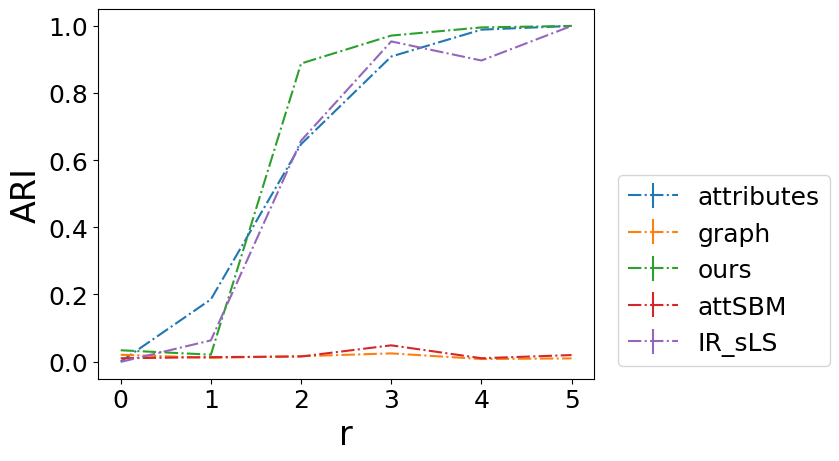

  0%|                                                     | 0/6 [00:00<?, ?it/s]

8
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/5/r/1/att_0.npy"   
[2] "./data/Benchmark/a/5/r/1/net_0.npy"   
[3] "./data/Benchmark/a/5/r/1/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 58.61624



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -203622.9
[1] -196446.9
[1] -196446.9
   [1] 4 1 2 4 2 4 4 4 2 4 4 4 4 4 4 4 4 3 4 4 4 3 2 3 3 4 4 1 4 4 4 2 1 4 4 4 4
  [38] 4 3 2 2 4 1 4 1 4 3 1 4 3 4 4 4 4 3 1 4 1 4 1 4 4 4 3 4 4 4 2 4 1 4 4 2 1
  [75] 4 3 3 4 1 2 4 4 4 4 4 4 1 1 1 4 4 4 2 4 3 2 3 4 2 4 4 1 4 4 2 2 4 4 4 1 4
 [112] 2 3 4 2 4 1 1 1 4 4 4 4 4 4 3 4 4 4 3 4 1 1 4 4 4 4 4 4 4 1 4 1 4 4 1 4 1
 [149] 2 1 1 3 4 4 4 1 2 4 2 4 4 4 1 3 4 4 4 4 4 4 3 4 3 3 4 4 1 2 2 4 4 4 4 4 4
 [186] 4 3 4 4 4 4 4 4 1 2 1 2 4 4 4 1 4 1 4 4 2 4 4 1 4 4 4 4 4 4 4 1 3 4 2 4 4
 [223] 3 2 3 3 2 2 2 3 4 1 4 4 4 4 1 4 4 2 4 2 4 4 3 4 2 4 4 4 4 3 4 4 2 4 4 4 2
 [260] 4 4 4 4 4 1 4 4 4 4 3 4 4 4 4 4 4 4 2 4 4 4 4 3 4 4 2 4 4 1 4 3 2 4 2 1 4
 [297] 4 4 4 1 4 4 2 4 4 2 4 1 2 1 3 2 4 4 4 3 1 1 4 4 1 4 2 3 1 4 4 4 3 1 2 2 4
 [334] 4 1 4 1 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4
 [371] 4 4 2 3 4 1 4 4 3 1 4 4 4 4 4 1 4 4 4 4 4 4 4 4 2 4 4 1 4 4 4 3 1 4 4 3 3
 [408] 3 2 2 4 4 4 2 1 4 3 3 4 1 1 4 3 4 4 3 1 4 2 4 1 4 4 4 4 2 4 

 17%|███████▎                                    | 1/6 [03:39<18:17, 219.48s/it]

8
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/7/r/1/att_0.npy"   
[2] "./data/Benchmark/a/7/r/1/net_0.npy"   
[3] "./data/Benchmark/a/7/r/1/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 59.95192



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -218846.1
[1] -211161.1
[1] -211161.1
   [1] 3 2 1 3 4 4 4 1 1 4 1 1 4 4 4 4 4 4 2 4 4 4 1 4 4 3 1 4 3 2 1 4 4 2 2 4 2
  [38] 4 4 4 1 4 4 4 4 4 4 1 4 4 2 4 4 1 2 3 4 4 2 4 2 4 2 4 3 4 2 4 4 2 4 4 4 4
  [75] 4 4 4 4 2 4 2 4 2 4 4 1 1 4 4 4 4 4 1 1 4 3 4 4 4 4 4 4 4 2 3 4 4 2 4 4 4
 [112] 4 4 1 1 2 4 1 4 4 2 1 1 4 2 4 4 4 4 4 2 4 4 2 2 4 2 4 2 1 4 4 3 2 4 2 4 4
 [149] 4 4 4 1 1 4 2 4 4 4 4 3 4 4 4 2 4 4 2 4 4 3 1 1 2 2 4 4 4 2 2 4 4 4 4 1 3
 [186] 1 4 2 4 4 4 2 4 4 1 4 4 2 2 4 3 4 1 4 2 2 2 4 4 4 4 4 4 3 4 3 4 2 4 3 4 2
 [223] 1 4 2 4 2 4 4 1 2 4 4 2 1 2 2 4 4 4 4 4 3 2 4 2 1 4 2 1 3 4 3 2 4 4 2 2 4
 [260] 2 4 1 4 4 2 4 4 1 2 4 4 2 2 4 3 4 3 4 1 4 4 4 4 4 2 3 4 4 4 4 4 4 2 4 2 4
 [297] 1 4 3 4 4 4 4 4 4 4 2 4 4 1 1 4 4 4 4 3 4 4 4 4 1 4 4 2 1 3 4 4 3 4 3 2 1
 [334] 1 4 4 1 4 4 1 4 4 2 1 4 4 4 1 4 4 4 1 4 4 4 4 4 4 2 4 4 4 1 1 1 4 2 1 4 4
 [371] 4 4 4 1 1 4 2 1 2 4 4 4 4 1 1 4 4 4 4 4 4 2 4 1 4 4 4 2 4 4 1 4 4 4 4 1 2
 [408] 1 4 4 4 1 1 1 4 4 1 4 2 4 4 4 1 4 1 3 4 4 1 3 1 4 2 1 2 4 4 

 33%|██████████████▋                             | 2/6 [07:20<14:41, 220.33s/it]

10
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/9/r/1/att_0.npy"   
[2] "./data/Benchmark/a/9/r/1/net_0.npy"   
[3] "./data/Benchmark/a/9/r/1/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 59.41137
[1] -233411.5
[1] -225071
[1] -225071
   [1] 4 4 4 4 4 4 2 4 4 4 4 4 3 2 4 2 4 4 4 4 2 2 1 3 1 4 4 1 4 4 4 4 3 2 4 4 4
  [38] 4 4 4 4 1 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 3 1 4 4 4 2 3 1 4 1 3 4 2
  [75] 4 3 4 1 2 4 4 4 1 1 4 1 4 2 4 4 4 4 4 1 2 4 4 1 4 1 1 2 1 4 4 4 1 3 1 1 1
 [112] 4 3 4 4 4 4 4 4 2 4 1 1 4 4 1 4 4 3 4 4 3 1 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4
 [149] 4 4 4 1 4 4 4 4 4 4 1 4 3 1 4 4 4 4 2 1 4 4 4 1 4 4 4 2 4 4 4 4 2 2 3 1 4
 [186] 2 4 4 4 4 1 4 4 4 1 4 4 4 4 4 1 4 1 4 4 4 4 4 4 4 4 4 4 4 3 4 2 4 4 4 3 4
 [223] 4 4 4 3 2 4 4 1 4 4 4 3 1 4 4 4 1 1 1 1 4 4 4 4 2 3 2 4 4 4 4 2 4 4 4 4 4
 [260] 4 4 1 4 4 4 4 4 4 4 2 1 4 4 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4
 [297] 4 4 4 4 4 4 3 4 1 2 4 4 4 2 4 4 2 3 4 4 4 1 4 4 4 3 4 4 1 4 3 3 3 3 1 4 2
 [334] 1 4 3 4 4 4 1 4 4 3 1 4 3 4 4 4 4 4 4 2 4 1 4 2 4 4 2 4 4 4 1 4 4 4 3 1 1
 [371] 4 4 4 4 1 4 4 4 4 4 1 4 1 1 3 3 4 4 4 4 4 2 1 2 4 4 3 2 1 3 3 2 4 3 4 4 4
 [408] 1 4 4 3 4 4 1 1 

 50%|██████████████████████                      | 3/6 [11:12<11:16, 225.48s/it]

4
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/11/r/1/att_0.npy"   
[2] "./data/Benchmark/a/11/r/1/net_0.npy"   
[3] "./data/Benchmark/a/11/r/1/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 49.48549
[1] -248170.6
[1] -237904.6
[1] -237904.6 -237753.8
[1] -237904.6 -237753.8 -237753.6
   [1] 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
  [38] 4 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 3 3 3 2
  [75] 3 3 1 3 1 3 3 3 1 3 3 3 2 2 4 3 3 3 3 1 3 3 2 3 1 4 3 2 4 4 3 3 3 3 3 3 3
 [112] 3 3 2 3 3 1 3 1 3 3 3 3 3 3 2 3 1 3 3 3 3 3 3 1 3 3 3 3 2 1 1 3 3 3 3 3 4
 [149] 1 3 1 3 3 3 3 2 3 3 3 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 [186] 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3
 [223] 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 4 3 3 3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [260] 3 3 2 3 2 3 3 2 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3
 [297] 3 3 3 3 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2
 [334] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4
 [371] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4

 67%|█████████████████████████████▎              | 4/6 [15:30<07:57, 238.54s/it]

4
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/13/r/1/att_0.npy"   
[2] "./data/Benchmark/a/13/r/1/net_0.npy"   
[3] "./data/Benchmark/a/13/r/1/z_init_0.npy"



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "this is the initial error!!!"
[1] 48.228
[1] -259461.3
[1] -251209.8
[1] -251209.8
   [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [112] 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [297] 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [334] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [371] 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [408] 4 4 4 4 4 4 3 

 83%|████████████████████████████████████▋       | 5/6 [19:35<04:00, 240.80s/it]

4
Memberships from graph:  (1200, 4) 4
Initialisation chosen from the graph
[1] TRUE
[1] "./data/Benchmark/a/15/r/1/att_0.npy"   
[2] "./data/Benchmark/a/15/r/1/net_0.npy"   
[3] "./data/Benchmark/a/15/r/1/z_init_0.npy"
[1] "this is the initial error!!!"
[1] 49.44831



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] -277575.6
[1] -262276.2
[1] -262276.2 -260956.1
[1] -262276.2 -260956.1 -259739.3
[1] -262276.2 -260956.1 -259739.3
   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
  [75] 3 3 1 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 1 3 3 3
 [112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 1 3 3 3 3 3 3
 [149] 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [260] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3
 [297] 1 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [334] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [371] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

100%|████████████████████████████████████████████| 6/6 [24:24<00:00, 244.08s/it]


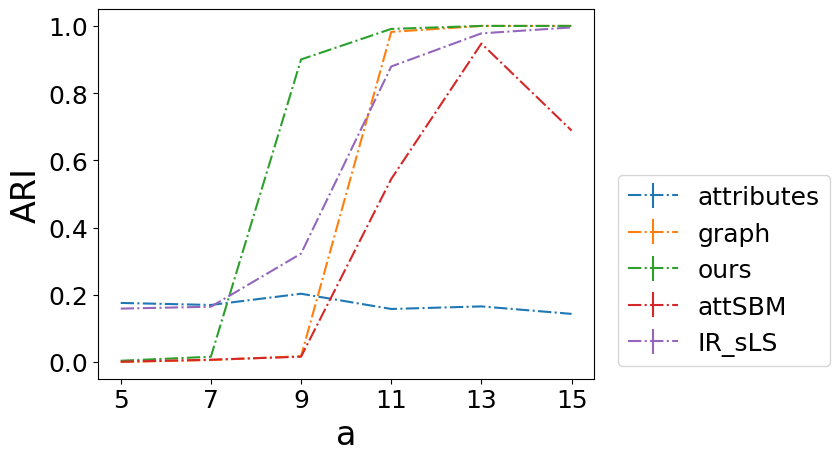

In [7]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
benchmark = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'chernoff',
                    hard_clustering=True)
benchmark.run_test(n_average=1,cluster_sizes=sizes,\
                 b=5,\
                 a_range=[ 5,7,9,11,13,15 ],\
                 r_range = [ 0,1,2,3,4,5 ],\
                 dense=False,\
                 binary=True,\
                 file_endings=".jpeg",\
                 n_iters=25)

## Test 2_1

In [ ]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
benchmark = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'chernoff',
                    hard_clustering=False)
stats = benchmark.run_2_1(n_average=1,
                            cluster_sizes=sizes,
                            b=5,
                            a_range= a_range,
                            r_range = r_range,
                            dense=False,
                            binary=True,
                            n_iters=25)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

## Test 2_2

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
d_range = np.arange(1,6)
mu_range = np.linspace(0,6,20)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                  )\
                  .run_2_2(n_average=10,
                            cluster_sizes=sizes,
                             d_range = d_range,
                             mu_range = mu_range,
                             dense=True,
                             binary=False)
with open('test_2_2.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_2.pickle" "/content/drive/MyDrive"

## Test 2_3

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
d_range = np.arange(1,5)
a_range = np.linspace(5,14,10)
lambda_range = np.arange(1,6)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                 )\
                  .run_2_3(n_average=10,
                            cluster_sizes=sizes,
                            d_range= d_range,
                            lambda_range = lambda_range,
                            a_range = a_range,
                            b = 5,
                            dense=False,
                            binary=False)
with open('test_2_3.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_3.pickle" "/content/drive/MyDrive"

## Test 2_4

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,10)
w_averages = np.linspace(1,5,10)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_4(n_average=10,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_4.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_4.pickle" "/content/drive/MyDrive"

## Test 2_5

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,5)
w_averages = np.array([1,3,6,9,12])
stats = BregmanBenchmark(att_variance=n_average,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_5(n_average=n_average,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_5.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_5.pickle" "/content/drive/MyDrive"

In [ ]:
test_2_5=None
with open("/content/drive/MyDrive/test_2_5.pickle", 'rb') as handle:
    test_2_5 = pickle.load(handle)
test_2_5.keys()
df = pd.DataFrame.from_dict(test_2_5)
# labels = [ 'EM-GMM', 'SC', 'Algo1', 'attSBM','IR_sLS']
# algos = ["attributes", "graph", "ours", "attSBM", "IR_sLS"]
# saveFig = True
# for varying in ["graph","attributes"]:
#   curves = []
#   curves_std = []
#   for algo in algos:
#     curves.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI"])
#     curves_std.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI_std"])
#   if varying == 'graph':
#     x = df.loc[(df['varying'] == "graph")]["weights_avg"].unique()
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_att_' + str(2)  +  '_nAverage' + str(n_average) + '.jpeg'
#     plotting( x, curves, labels, curves_std = curves_std, xticks = x, xlabel = 'weights_avg', saveFig = True, fileName = fileName )
#     plt.close()
#   elif varying == 'attributes':
#     x = df.loc[(df['varying'] == "attributes")]["attributes_avg"].unique()
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_w_' + str(2) + '_nAverage_' + str(n_average) + '.jpeg'
#     plotting( x , curves, labels, curves_std = curves_std, xticks = x, xlabel = 'attributes_avg', saveFig = True, fileName = fileName )
#     plt.close()

## Test Real Data

In [8]:
edgeSimilarity = "jaccard"

Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!


['NMI', 'ARI', 'AMI', 'S&S', 'CC']

CURRENT DATASET:  CiteSeer


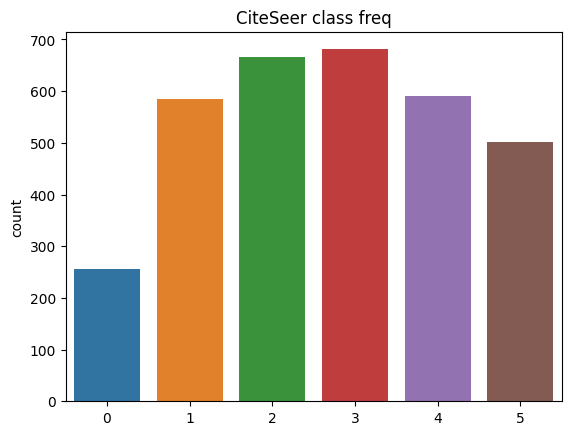

424
Memberships from graph:  (3279, 6) 6
Initialisation chosen from the graph
422
Memberships from graph:  (3279, 6) 6
Initialisation chosen from the graph

CURRENT DATASET:  Cora


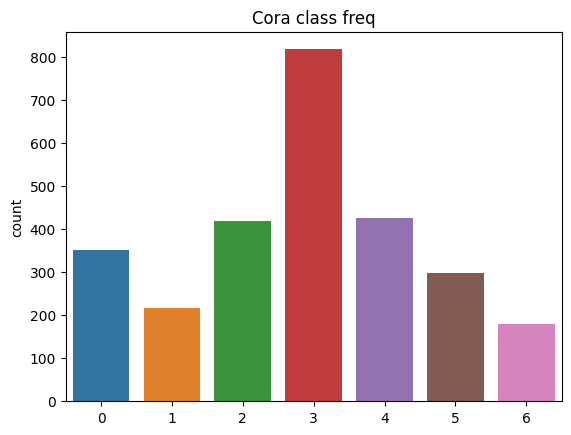

103
Memberships from graph:  (2708, 7) 7
Initialisation chosen from the attributes


In [ ]:
attributes_distribution = "bernoulli"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
benchmark = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'chernoff',
                    hard_clustering=True)
scores = benchmark.run_real_data(n_iters=25,n_runs=1,
                                 edgeSimilarity=edgeSimilarity,
                                 weightSimilarity="gaussian",
                                 attributesSimilarity="hamming")
scores

In [ ]:
df = pd.DataFrame(scores)
df_grouped = df.groupby(by="dataset")
for key, item in df_grouped:
    print(df_grouped.get_group(key), "\n\n")

In [ ]:
df

In [ ]:
with open(f'/content/drive/MyDrive/test_real_data_{edgeSimilarity}.pickle', 'wb') as handle:
    pickle.dump(scores, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
scores=None
with open(f"/content/drive/MyDrive/test_real_data_{edgeSimilarity}.pickle", 'rb') as handle:
    scores = pickle.load(handle)
scores.keys()

In [ ]:
df[['NMI', 'NMI_std', 'ARI', 'ARI_std', 'AMI', 'AMI_std', 'algorithm', 'dataset']].to_csv("results_1.csv",index=False)
df[[ 'S&S', 'S&S_std', 'CC', 'CC_std', 'algorithm', 'dataset']].to_csv("results_2.csv",index=False)

In [ ]:
from google.colab import runtime
runtime.unassign()

# Begin Plots

In [ ]:
from BregmanTests.utils import *

In [ ]:
test_2_1=None
with open("/content/drive/MyDrive/test_2_1.pickle", 'rb') as handle:
    test_2_1 = pickle.load(handle)
test_2_1.keys()

In [ ]:
scatter_(test_2_1,'a', 'r', 'ARI')

In [ ]:
scatter_with_colorbar(test_2_1,'a', 'r', 'ARI')

In [ ]:
test_2_4=None
SIZE_TITLE = 24
SIZE_LABELS = 24
SIZE_TICKS = 18
SIZE_LEGEND = 18
with open("/content/drive/MyDrive/test_2_4.pickle", 'rb') as handle:
    test_2_4 = pickle.load(handle)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = np.array(test_2_4["lambda_att"]),np.array(test_2_4["lambda_w"]),np.array(test_2_4["ARI"])
xlabel="attributes_avg"
ylabel="weights_avg"
C = ax.scatter(x=1/x,y=1/y,c=z,cmap="coolwarm")
plt.ylim(0.9,3.5)
ticks = np.linspace(z.min(), z.max(), 5, endpoint=True)
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI',ticks=ticks)
cb.set_label(label='ARI', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

In [ ]:
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0]).T
make_contour_plot(vals_x,vals_y,z,x_label="a",y_label="r",filename="contour_plot_2_1.jpeg")

In [ ]:
test_2_2=None
with open("/content/drive/MyDrive/test_2_2.pickle", 'rb') as handle:
    test_2_2 = pickle.load(handle)
test_2_2.keys()

In [ ]:
scatter_(test_2_2,'d', 'mu', 'ARI')

In [ ]:
x,y,z = test_2_2["d"],test_2_2["mu"],test_2_2["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
# x,y = np.meshgrid(vals_x,vals_y)
z = np.array(z).reshape(len(vals_x),len(vals_y)).T
make_contour_plot(vals_x,vals_y,z,x_label="d",y_label="mu",filename="contour_plot_2_2.jpeg")

In [ ]:
test_2_3=None
with open("/content/drive/MyDrive/test_2_3.pickle", 'rb') as handle:
    test_2_3 = pickle.load(handle)
test_2_3.keys()

In [ ]:
x,y,z,data = test_2_3["d"],test_2_3["lambda"], test_2_3["a"],test_2_3["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
vals_z = np.unique(z)
"""
len(X) == N is the number of columns in data,
len(Y) == M is the number of rows in data.
len(Z) == P is the depth of data
DATA = M x N X P
"""
X = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
data = np.array(data).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
x_label="d"
y_label="lambda"
z_label = "a"

kw = {
        # 'vmin': data.min(),
        # 'vmax': data.max()
    }

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot contour surfaces
    ### This is the X x Y plane for z=zmax
_ = ax.contourf(
            X[:, :, -1], Y[:, :, -1], data[:, :, -1],
            zdir='z', offset=zmax, **kw
        )

    ### This is the X x Y plane for z=zmin
_ = ax.contourf(
            X[:, :, 0], Y[:, :, 0], data[:, :, 0],
            zdir='z', offset=zmin, **kw
        )

    ### This is the X x Z plane for y=ymax
_ = ax.contourf(
            X[-1, :, :], data[-1, :, :], Z[-1, :, :],
            zdir='y', offset=ymax, **kw
        )

    ### This is the X x Z plane for y=ymin
_ = ax.contourf(
            X[0, :, :], data[0, :, :], Z[0, :, :],
            zdir='y', offset=ymin, **kw
        )

    ### This is the Y x Z plane for x=xmax
_ = ax.contourf(
            data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
            zdir='x', offset=xmax, **kw
        )

    ### This is the Y x Z plane for x=xmin
C = ax.contourf(
            data[:, 0, :], Y[:, 0, :], Z[:, 0, :],
            zdir='x', offset=xmin, **kw
        )


# Plot edges
edges_kw = dict(color='0.4', linewidth=1,zorder=-1e3)
ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )

# Set zoom and angle view
ax.view_init(30, 45, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI')

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )
C = ax.scatter(xs=X,ys=Y,zs=Z,c=data)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.2, label='ARI')
plt.show()